In [1]:
import main
import baseline_version2 as bs
import numpy as np
import matplotlib.pyplot as plt
import peakutils
import pandas as pd

../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt Opened
1
2


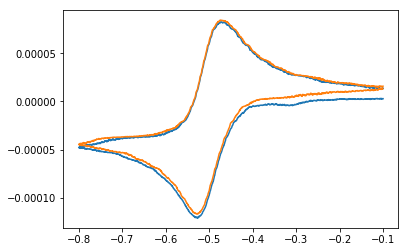

In [2]:

dict_1,n_cycle = main.read_file('../Rawdata/10mM_2,7-AQDS_1M_KOH_25mVs_0.5step_2.txt')
for i in range(n_cycle):
        print(i+1)
        df = main.data_frame(dict_1, i+1)
        plt.plot(df.Potential, df.Current, label = "Cycle{}".format(i+1))


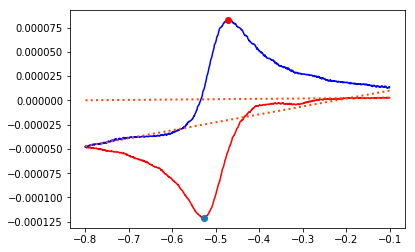

[0.05385200000000001, -0.499548, 0.00010294744495733317, 0.00012220200916608455, 0.8424365987094162]


In [9]:
# Over all wrapping function.

# This i is in range of number of cycles. 
for i in range(n_cycle-1):
    i = i+1
    df = main.data_frame(dict_1,i)
    x = df['Potential']
    y = df['Current']
    # Peaks are here [list]
    peak_index = main.peak_detection_fxn(y)
    # Split x,y to get baselines
    x1,x2 = main.split(x)
    y1,y2 = main.split(y)
    y_base1 = main.linear_background(x1,y1)
    y_base2 = main.linear_background(x2,y2)
    # Calculations based on baseline and peak
    values = main.peak_values(x,y)
    Et = values[0]
    Eb = values[2]
    dE = main.del_potential(x,y)
    half_E = min(Et,Eb) + main.half_wave_potential(x,y)
    ia = main.peak_heights(x,y)[0]
    ic = main.peak_heights(x,y)[1]
    ratio_i = main.peak_ratio(x,y)
    
plt.plot(x1,y1,color ='red')
plt.plot(x2,y2,color = 'blue')
plt.plot(x1[peak_index[1]],y1[peak_index[1]],marker='o')
plt.plot(x2[peak_index[0]],y2[peak_index[0]],marker='o',color = 'red')
plt.plot(x1, y_base1, color = "orangered", linestyle=':',linewidth=2) 
plt.plot(x2, y_base2, color = "orangered", linestyle=':',linewidth=2) 
plt.show()
print([dE, half_E , ia, ic, ratio_i ])
